### Import Statements

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [3]:
%matplotlib inline

## **Image Masking**

Remember bitwise operations?

<img src='./imgs/bitwise_operations.png'>

Bitwise operations are highly useful while extracting any part of the image, defining and working with non-rectangular ROI's, putting logo in images etc.

Another thing that these bitwise operations are specially good for is **creating masks.**

`A mask is a 8-bit single channel array, that specifies elements of the output array to be changed.`

**All the opencv bitwise operators takes one common (optional) argument, `mask`** and can be utilized in all sorts of ways.

- ### **Image masking by thresholding (Putting logo on an image)**

Say, we want to put the OpenCV logo above an image. If we add the two images, it will change the color. If we blend them, we get a transparent effect. But we want it to be opaque. If it was a rectangular region, we could directly assign it to the ROI. But the OpenCV logo is a not a rectangular shape. So to do this, we use the bitwise operations. Below is a step by step breakdown of how we can do it.

-> First let's read in the images

In [4]:
opencv_logo_white = cv.imread("./imgs/opencv_logo.png")
panda_img = cv.imread("./imgs/panda.jpeg")

In [5]:
opencv_logo_white.shape, panda_img.shape

((378, 428, 3), (704, 1024, 3))

-> The OpenCV Logo is a bit large compared to what we have in mind. Let's resize the logo.

In [6]:
opencv_logo_white = cv.resize(opencv_logo_white, (400, 300))

In [7]:
from funcs import matplotlib_imshow

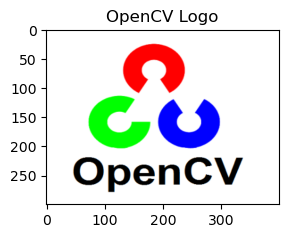

In [8]:
matplotlib_imshow("OpenCV Logo", opencv_logo_white, 3)

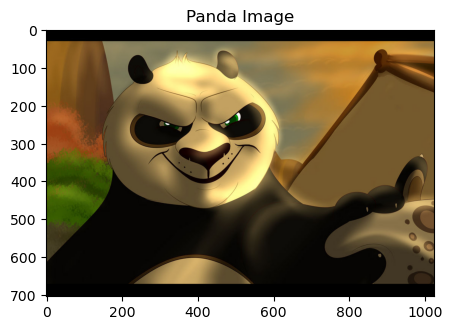

In [9]:
matplotlib_imshow("Panda Image", panda_img, 5)

-> We want to put the logo on the top right corner. So, we create a ROI.

In [10]:
logo_h, logo_w, channels = opencv_logo_white.shape
panda_img_h, panda_img_w, ch = panda_img.shape

logo_roi = panda_img[0:logo_h, (panda_img_w - logo_w) :, :]

In [11]:
logo_roi.shape

(300, 400, 3)

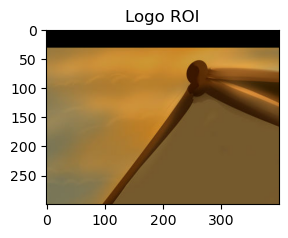

In [12]:
matplotlib_imshow("Logo ROI", logo_roi, 3)

-> The value of the argument 'mask' must be 8 bit single channel image i.e, grayscale image. So, we convert the OpenCV logo to grayscale.

In [13]:
logo_gray = cv.cvtColor(opencv_logo_white, cv.COLOR_BGR2GRAY)

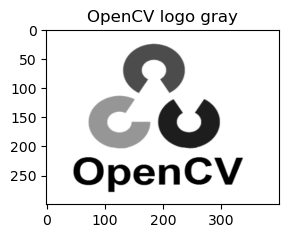

In [14]:
matplotlib_imshow("OpenCV logo gray", logo_gray, 3)

In [15]:
logo_gray.shape

(300, 400)

-> Now, we create a mask of the OpenCV logo

In [16]:
thresh_val, logo_mask = cv.threshold(logo_gray, 200, 255, cv.THRESH_BINARY)

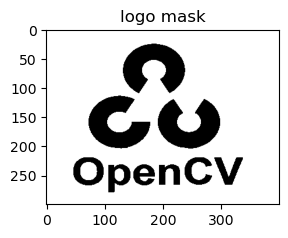

In [17]:
matplotlib_imshow("logo mask", logo_mask, 3)

In [18]:
logo_mask.shape

(300, 400)

-> We also create an inverted mask

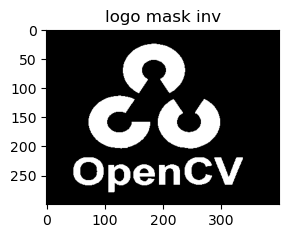

In [19]:
logo_mask_inv = cv.bitwise_not(logo_mask)
matplotlib_imshow("logo mask inv", logo_mask_inv, 3)

In [20]:
logo_mask_inv.shape

(300, 400)

-> Now, we black out the area of ROI where the actual logo should go

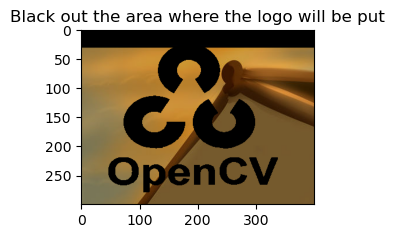

In [21]:
logo_img_bg = cv.bitwise_and(logo_roi, logo_roi, mask=logo_mask)
matplotlib_imshow("Black out the area where the logo will be put", logo_img_bg, 3)

In [22]:
logo_img_bg.shape

(300, 400, 3)

-> Now, we take out only the logo from the "OpenCV Logo" which is to be put into the "Panda" image

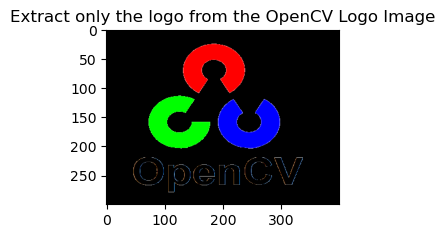

In [23]:
logo_img_fg = cv.bitwise_and(opencv_logo_white, opencv_logo_white, mask=logo_mask_inv)
matplotlib_imshow("Extract only the logo from the OpenCV Logo Image", logo_img_fg, 3)

In [24]:
logo_img_fg.shape

(300, 400, 3)

-> Now, we put the logo into the ROI (i.e, put the foreground onto the background)

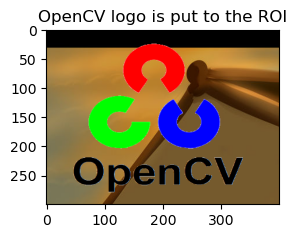

In [25]:
dst = cv.add(logo_img_fg, logo_img_bg)
matplotlib_imshow("OpenCV logo is put to the ROI", dst, 3)

-> Finally, we modify the Original "Panda" image

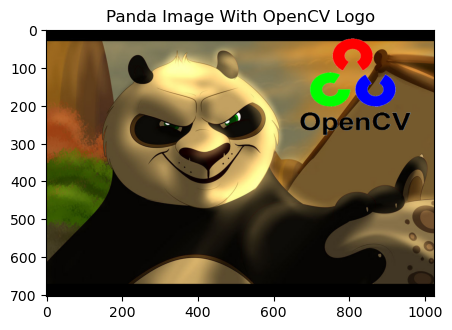

In [26]:
panda_img[0:logo_h, (panda_img_w - logo_w) :, :] = dst
matplotlib_imshow("Panda Image With OpenCV Logo", panda_img)

#### *So what did we do and why we did it?*

Upto the 4th step (where we converted the logo image to a grayscale one) is pretty much understandable. We will discuss starting from the 5th step. Just **keep in mind** that, the `mask defines which elements in the output will be modified.`


-> **`In the 5th step`**, we created a mask from our grayscaled logo image. In the mask the logo area we are interested in is all black. To do that we thresholded the image with the flag *cv.THRESH_BINARY*. This thresholding caused our logo mask to have either 255 (1 in each bit of the 8 bits) or 0 (0 in each bit of the 8 bits) as pixel values. As a result the logo area we are interested in ended up with 0's as pixel values. So what's the benefit? The benefit is that, **`in the 7th step`** when we use *cv.bitwise_and()* we effectively eliminate the possiblity of changing the elements (in the output roi image) outside the interested logo area (as those bits contains 1's). But this has one disadvantage too. The logo we want to put will now be all black instead of the vibrant color we want. How do we fix that?

-> **`In the 6th step`**, we created an inverted mask where the logo area we are interested in is all white and the surrounding area is all black. **`In the 8th step`** we use this mask with *cv.bitwise_and()* and apply it to the original logo image. This allows the logo area we are interested in to peer through (if you will). Now we can use this output image to fix the problem produced in the previous step.

-> The image output in the 7th step has the logo area we are interested in as all black but the surrounding area is RGB. The image output in the 8th step has the logo area we are interested in RGB but the surrounding area is all black. See where we are going with that? We add these two images to produce the desired output image, the original roi with logo imprinted on it.

- ### **Image Masking Based on Color**

> The `cv.inRange(img, lower, upper)` function for filtering based on color

The function is used to create a binary mask that selects pixels within the specified color range. The pixels that fall within the specified range will be set to white (255), and the pixels outside the range will be set to black (0) in the resulting mask.

<u> Function Parameters: </u>
- `img` is the input image (or array) on which you want to apply the color range filtering.
- `lower` is an array representing the lower bound of the color range for each color channel.
- `upper` is an array representing the upper bound of the color range for each color channel.

**`Note:`** you can add multiple masks together to create a final mask. This may be necessary when filtering the red color in HSV images.

*These websites may be useful for choosing the right color range in different color spaces.*

1. [RGB color ranges for different colors and different shades of a color](https://www.rapidtables.com/web/color/html-color-codes.html)
2. [Color Picker for accurate and efficient color selection across HEX, RGB, CMYK, HSV, HSL, and RGBA models](https://www.developmenttools.com/color-picker/)

In [29]:
# reading in image
road_img = cv.cvtColor(cv.imread("./imgs/road.jpeg"), cv.COLOR_BGR2RGB)

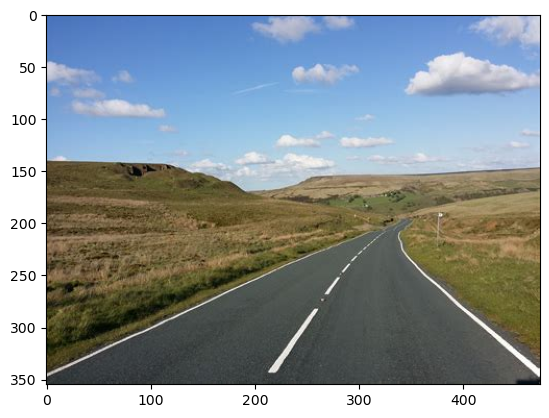

In [30]:
plt.imshow(road_img)

In [43]:
# we want to filter out the road from the image
lower_range = np.array([60, 60, 60])
upper_range = np.array([128, 128, 128])

In [44]:
mask = cv.inRange(road_img, lower_range, upper_range)

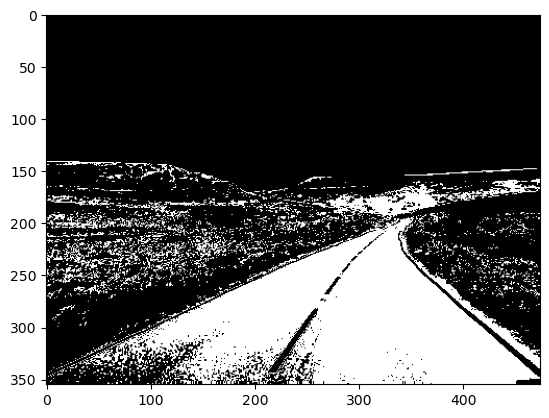

In [45]:
plt.imshow(mask, 'gray')

In [51]:
# applying the mask
masked_road = cv.bitwise_and(road_img, road_img, mask=mask)

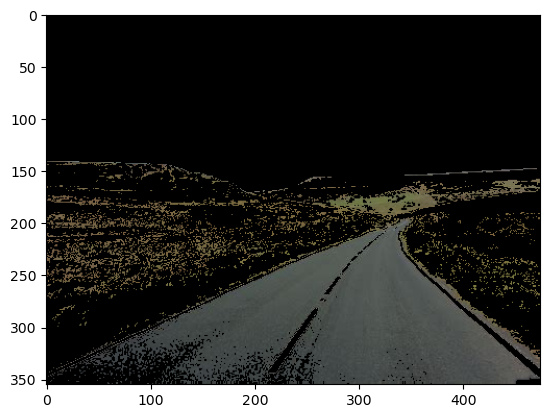

In [52]:
plt.imshow(masked_road)

**`Note:`** The grayish color on the road is because of bitwise and between white pixels of the "mask" and dark gray pixels of the "road_img". Try filtering with HSV color space since it's more appropriate than RGB for such tasks.